In [3]:
%cd ../..

/home/dmoreno/ATAT_ZTF/elasticc_one


# Confusion matrices

In [4]:
import os
import json 
import torch

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#from utils import get_y_test_pred_folds, get_confusion_matrix

/home/dmoreno/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
path_data = './data/final/ZTF_ff/LC_MD_FEAT_v2'
path_results = './results/ZTF/LC_MD_FEAT/prueba_lc_md_feat_v2'
time_to_eval = 2048

order_classes = ['SNIa', 
                 'SNIbc', 
                 'SNII', 
                 'SNIIb', 
                 'SNIIn', 
                 'SLSN', 
                 'TDE', 
                 'Microlensing', 
                 'QSO', 
                 'AGN', 
                 'Blazar', 
                 'YSO', 
                 'CV/Nova', 
                 'LPV', 
                 'EA', 
                 'EB/EW', 
                 'Periodic-Other', 
                 'RSCVn', 
                 'CEP', 
                 'RRLab', 
                 'RRLc', 
                 'DSCT']

In [6]:
with open('{}/dict_info.json'.format(path_data)) as f:
   dict_info = json.load(f)

mapping_classes = dict_info['mapping_classes']
mapping_classes_inverted = {v: k for k, v in mapping_classes.items()}
print(mapping_classes_inverted)

{0: 'SNIIn', 1: 'DSCT', 2: 'EB/EW', 3: 'QSO', 4: 'RSCVn', 5: 'AGN', 6: 'SNIa', 7: 'LPV', 8: 'RRLc', 9: 'YSO', 10: 'RRLab', 11: 'CEP', 12: 'EA', 13: 'Periodic-Other', 14: 'CV/Nova', 15: 'Blazar', 16: 'SNIIb', 17: 'TDE', 18: 'SLSN', 19: 'SNII', 20: 'SNIbc', 21: 'Microlensing'}


In [7]:
predictions = torch.load('{}/predictions_times.pt'.format(path_results))
predictions

{'SNID': array([b'ZTF17aaagryq', b'ZTF17aaaidzt', b'ZTF17aaaorgv', ...,
        b'ZTF22abscvex', b'ZTF23aahyznf', b'ZTF23aamsarj'], dtype=object),
 'y_test': tensor([ 9, 11, 12,  ...,  6,  6, 19]),
 'list_y_pred': {'test_16': tensor([ 9,  9,  9,  ..., 19, 19, 19]),
  'test_32': tensor([ 9,  9,  9,  ...,  6,  6, 19]),
  'test_64': tensor([9, 9, 9,  ..., 6, 6, 6]),
  'test_128': tensor([ 9,  9,  9,  ...,  6,  6, 19]),
  'test_256': tensor([ 9, 11, 12,  ...,  6,  6,  6]),
  'test_512': tensor([ 9, 11, 12,  ...,  6,  6,  6]),
  'test_1024': tensor([ 9, 11, 12,  ...,  6, 20,  6]),
  'test_2048': tensor([ 9, 11, 12,  ...,  6,  6,  6])}}

In [31]:
mapping_classes_inverted[9]

'YSO'

In [33]:
y_test_label = predictions['y_test']
y_pred_label = predictions['list_y_pred']['test_2048']

y_test_label = [mapping_classes_inverted[x] for x in y_test_label.numpy()]
y_pred_label = [mapping_classes_inverted[x] for x in y_pred_label.numpy()]

In [34]:
y_test_label

['YSO',
 'CEP',
 'EA',
 'CV/Nova',
 'EA',
 'CEP',
 'CEP',
 'EB/EW',
 'EB/EW',
 'EB/EW',
 'EB/EW',
 'EB/EW',
 'RRLab',
 'DSCT',
 'DSCT',
 'EB/EW',
 'Blazar',
 'AGN',
 'QSO',
 'RRLab',
 'Blazar',
 'RRLab',
 'EB/EW',
 'LPV',
 'CV/Nova',
 'EA',
 'LPV',
 'LPV',
 'RRLab',
 'EA',
 'EB/EW',
 'RRLc',
 'LPV',
 'LPV',
 'RRLab',
 'EA',
 'CV/Nova',
 'CV/Nova',
 'YSO',
 'RRLc',
 'DSCT',
 'RRLc',
 'EA',
 'LPV',
 'EA',
 'EA',
 'LPV',
 'AGN',
 'RRLab',
 'YSO',
 'RRLc',
 'YSO',
 'Periodic-Other',
 'DSCT',
 'AGN',
 'Blazar',
 'RRLc',
 'AGN',
 'RSCVn',
 'CV/Nova',
 'EA',
 'AGN',
 'AGN',
 'RRLc',
 'RSCVn',
 'RRLab',
 'QSO',
 'RRLab',
 'Periodic-Other',
 'LPV',
 'TDE',
 'RSCVn',
 'Blazar',
 'DSCT',
 'SNII',
 'QSO',
 'QSO',
 'CEP',
 'RSCVn',
 'SNIa',
 'SNII',
 'SNII',
 'Periodic-Other',
 'SNIa',
 'SNII',
 'SNIbc',
 'YSO',
 'SNII',
 'RSCVn',
 'AGN',
 'RRLc',
 'SNIa',
 'SNIbc',
 'SNIa',
 'SNII',
 'SNII',
 'SNIa',
 'EA',
 'EA',
 'RRLc',
 'CEP',
 'RRLab',
 'RRLc',
 'EA',
 'EA',
 'DSCT',
 'SNIbc',
 'Blazar',
 'QS

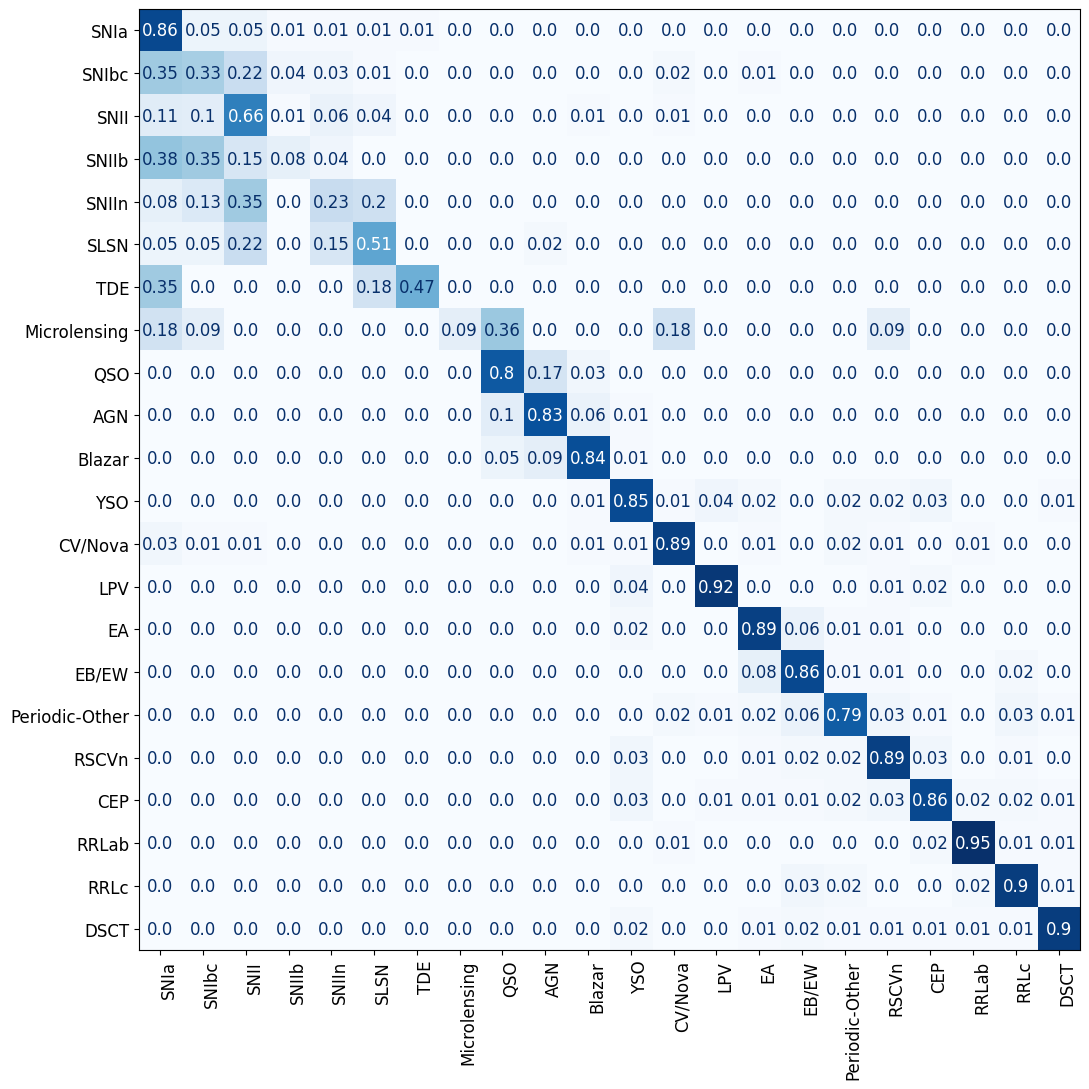

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

fs = 12

cm = confusion_matrix(y_true=y_test_label, y_pred=y_pred_label, labels=order_classes, normalize='true')

cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(11, 11)) #, dpi=110)
im = ax.imshow(np.around(cm, decimals=2), interpolation='nearest', cmap=cmap)

# color map
new_color = cmap(1.0) 

# Añadiendo manualmente las anotaciones con la media y desviación estándar
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] >= 0.005:
            #print(cm[i, j])
            text = f'{np.around(cm[i, j], decimals=2)}'
            color = "white" if cm[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
            ax.text(j, i, text, ha="center", va="center", color=color, fontsize=fs)
        else:
            text = f'{np.around(cm[i, j], decimals=2)}'
            color = "white" if cm[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
            ax.text(j, i, text, ha="center", va="center", color=color, fontsize=fs)

# Ajustes finales y mostrar la gráfica
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(np.arange(len(order_classes)))
ax.set_yticks(np.arange(len(order_classes)))
ax.set_xticklabels(order_classes)
ax.set_yticklabels(order_classes)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.xaxis.labelpad = 13
ax.yaxis.labelpad = 13

plt.tight_layout()
plt.show()

## ATAT (LC + MD + Features + MTA) 

In [ ]:
with open('final_dataset/dict_classes.json') as f:
   dict_classes = json.load(f)

print(dict_classes)
dict_classes = {v: k for k, v in dict_classes.items()}

#path_exp = 'results_paper/lc/Exp_cfg_-arch=lc_mtime'
path_exp = 'results_paper/lc_tab/Exp_cfg_-arch=lc_header_feat_mtime'
folds = [0, 1, 2, 3, 4]

list_pred_folds = get_y_test_pred_folds(path_exp, dict_classes, folds)

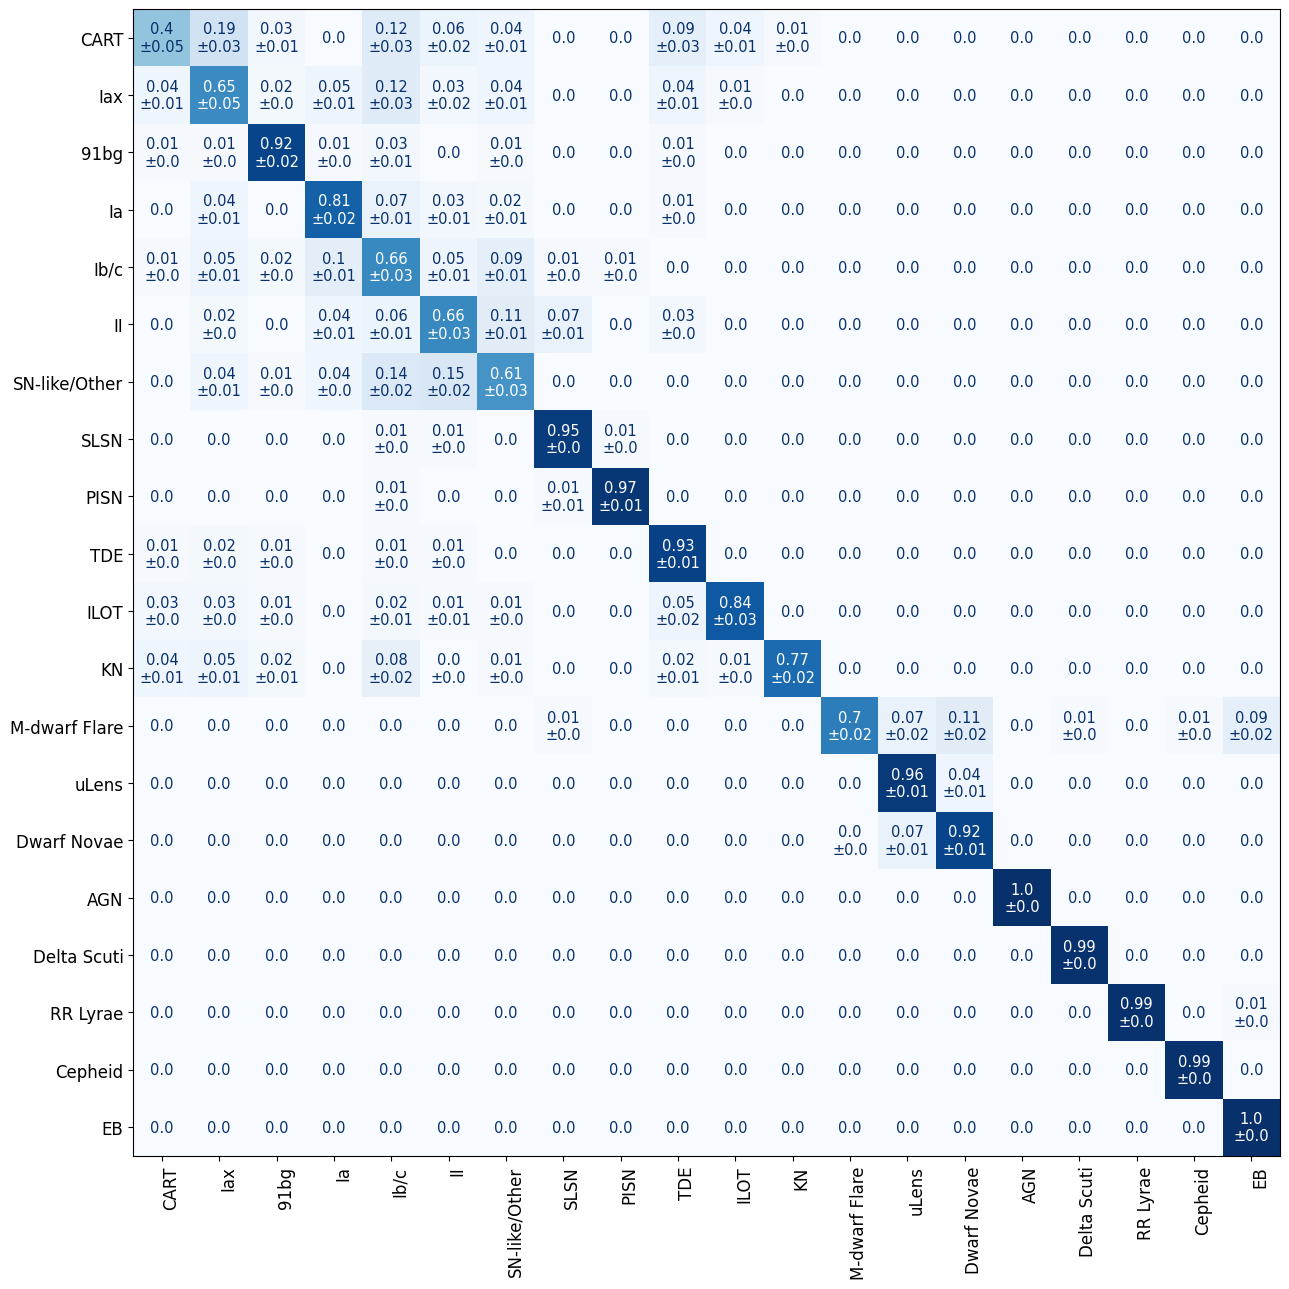

In [49]:
# Suponiendo que tienes y_test_label1, y_pred_label1, y_test_label2, y_pred_label2, etc.
matrices = []
for y_test, y_pred in list_pred_folds:
    cm = confusion_matrix(y_test, y_pred, labels=order_classes, normalize='true')
    matrices.append(cm)

# Calculando la media y la desviación estándar
mean_matrix_lc_md_feat = np.mean(matrices, axis=0)
std_matrix_lc_md_feat = np.std(matrices, axis=0)

get_confusion_matrix(mean_matrix_lc_md_feat, std_matrix_lc_md_feat, order_classes)

## ATAT (LC + MD + MTA) 

In [52]:
#path_exp = 'results_paper/lc/Exp_cfg_-arch=lc_mtime'
path_exp = 'results_paper/lc_tab/Exp_cfg_-arch=lc_header_mtime'
folds = [0, 1, 2, 3, 4]

list_pred_folds = get_y_test_pred_folds(path_exp, dict_classes, folds)

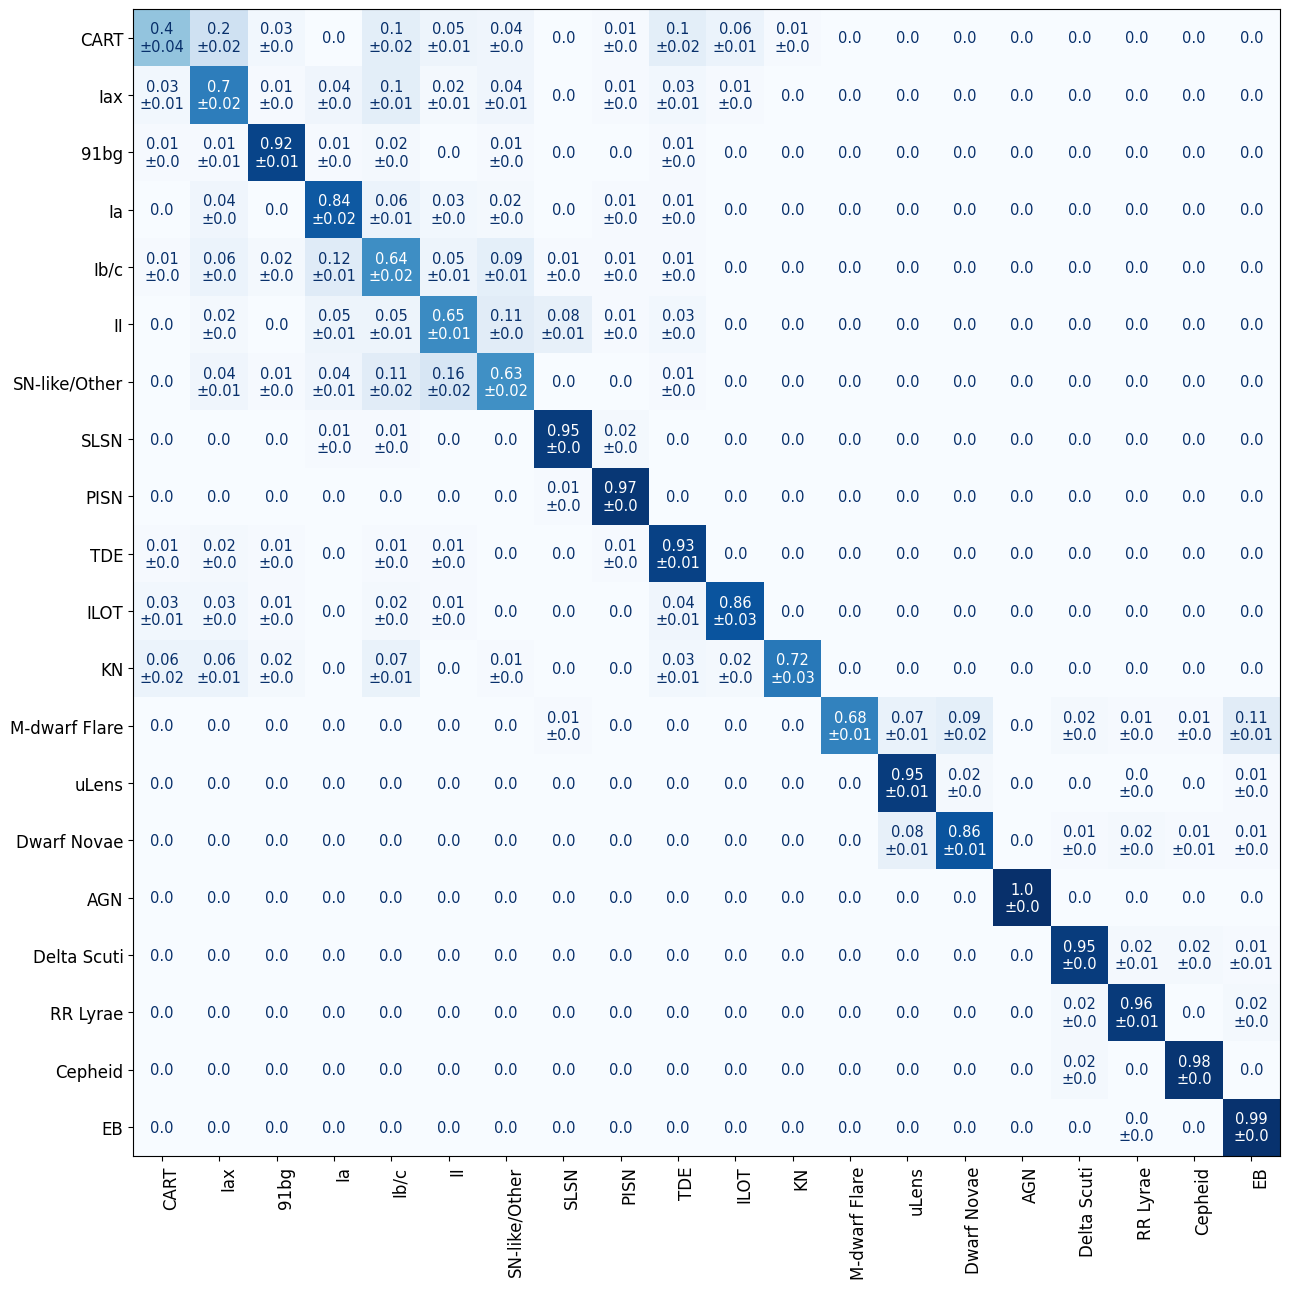

In [53]:
# Suponiendo que tienes y_test_label1, y_pred_label1, y_test_label2, y_pred_label2, etc.
matrices = []
for y_test, y_pred in list_pred_folds:
    cm = confusion_matrix(y_test, y_pred, labels=order_classes, normalize='true')
    matrices.append(cm)

# Calculando la media y la desviación estándar
mean_matrix_lc_md = np.mean(matrices, axis=0)
std_matrix_lc_md = np.std(matrices, axis=0)

get_confusion_matrix(mean_matrix_lc_md, std_matrix_lc_md, order_classes)

## Random Forest

In [54]:
import pandas as pd

path_root = 'results_rf_paper/2048_days'

In [55]:
test_proba_model = []
num_fold = 5

for i_fold in range(num_fold):
    test_proba_model.append(pd.read_parquet('./{}/test_predictions_proba_model_{}.parquet'.format(path_root, i_fold)))

    for idx_row in range(test_proba_model[i_fold].shape[0]):
        idx_col = test_proba_model[i_fold].iloc[idx_row].argmax()
        test_proba_model[i_fold].iloc[idx_row][idx_col] = 1

    test_proba_model[i_fold][test_proba_model[i_fold] != 1] = 0
    test_proba_model[i_fold] = test_proba_model[i_fold][order_classes]

display(test_proba_model[0].head())
display(test_proba_model[1].head())
print(test_proba_model[0].shape)

,CART,Iax,91bg,Ia,Ib/c,II,SN-like/Other,SLSN,PISN,TDE,ILOT,KN,M-dwarf Flare,uLens,Dwarf Novae,AGN,Delta Scuti,RR Lyrae,Cepheid,EB
SNID,,,,,,,,,,,,,,,,,,,,
63769469_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66380842_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64815643_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52486614_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34971786_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,CART,Iax,91bg,Ia,Ib/c,II,SN-like/Other,SLSN,PISN,TDE,ILOT,KN,M-dwarf Flare,uLens,Dwarf Novae,AGN,Delta Scuti,RR Lyrae,Cepheid,EB
SNID,,,,,,,,,,,,,,,,,,,,
63769469_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66380842_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64815643_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52486614_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34971786_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(20000, 20)


In [56]:
test_set = pd.read_parquet('./data_partition_paper/partitions.parquet')
test_set = test_set[test_set.partition == 'test'].drop(['partition'], axis=1)
test_set['SNID'] = test_set['SNID'].apply(lambda row: row+'_2048')
test_set = test_set.set_index('SNID')
test_set = pd.get_dummies(test_set.label, dtype=float)
test_set = test_set[order_classes]
test_set

,CART,Iax,91bg,Ia,Ib/c,II,SN-like/Other,SLSN,PISN,TDE,ILOT,KN,M-dwarf Flare,uLens,Dwarf Novae,AGN,Delta Scuti,RR Lyrae,Cepheid,EB
SNID,,,,,,,,,,,,,,,,,,,,
63769469_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66380842_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64815643_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52486614_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34971786_2048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34694580_2048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
42840389_2048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28545440_2048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
list_pred_folds = []
for i_fold in folds:
    y_test = np.argmax(test_set.reindex(test_proba_model[i_fold].index).values, axis=1)
    y_pred = np.argmax(test_proba_model[i_fold].values, axis=1)

    y_test_label = [dict_classes[x] for x in y_test]
    y_pred_label = [dict_classes[x] for x in y_pred]

    list_pred_folds.append((y_test_label, y_pred_label))
    

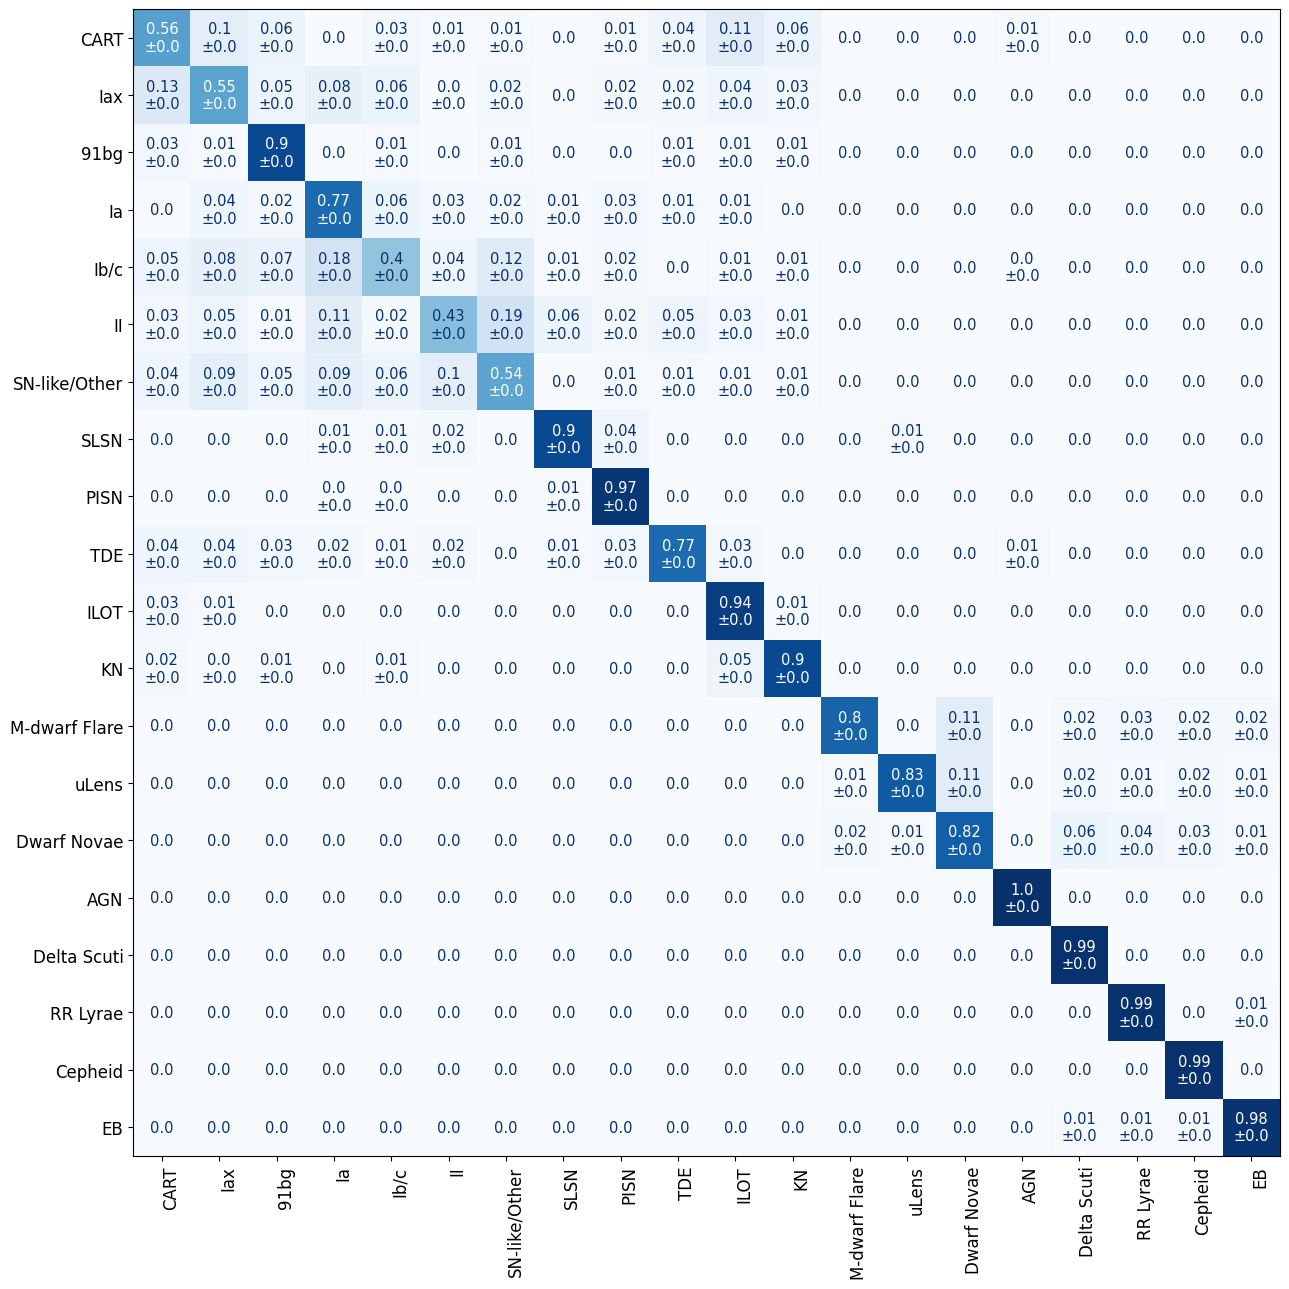

In [58]:
matrices = []
for y_test, y_pred in list_pred_folds:
    cm = confusion_matrix(np.argmax(test_set.reindex(test_proba_model[i_fold].index).values, axis=1), 
                          np.argmax(test_proba_model[i_fold].values, axis=1), 
                          normalize='true')
    #cm = confusion_matrix(test_set.reindex(test_proba_model[i_fold].index).values, test_proba_model[i_fold].values, normalize='pred')
    matrices.append(cm)

# Calculando la media y la desviación estándar
mean_matrix_rf = np.mean(matrices, axis=0)
std_matrix_rf = np.std(matrices, axis=0)

get_confusion_matrix(mean_matrix_rf, std_matrix_rf, order_classes)

## Joint plot

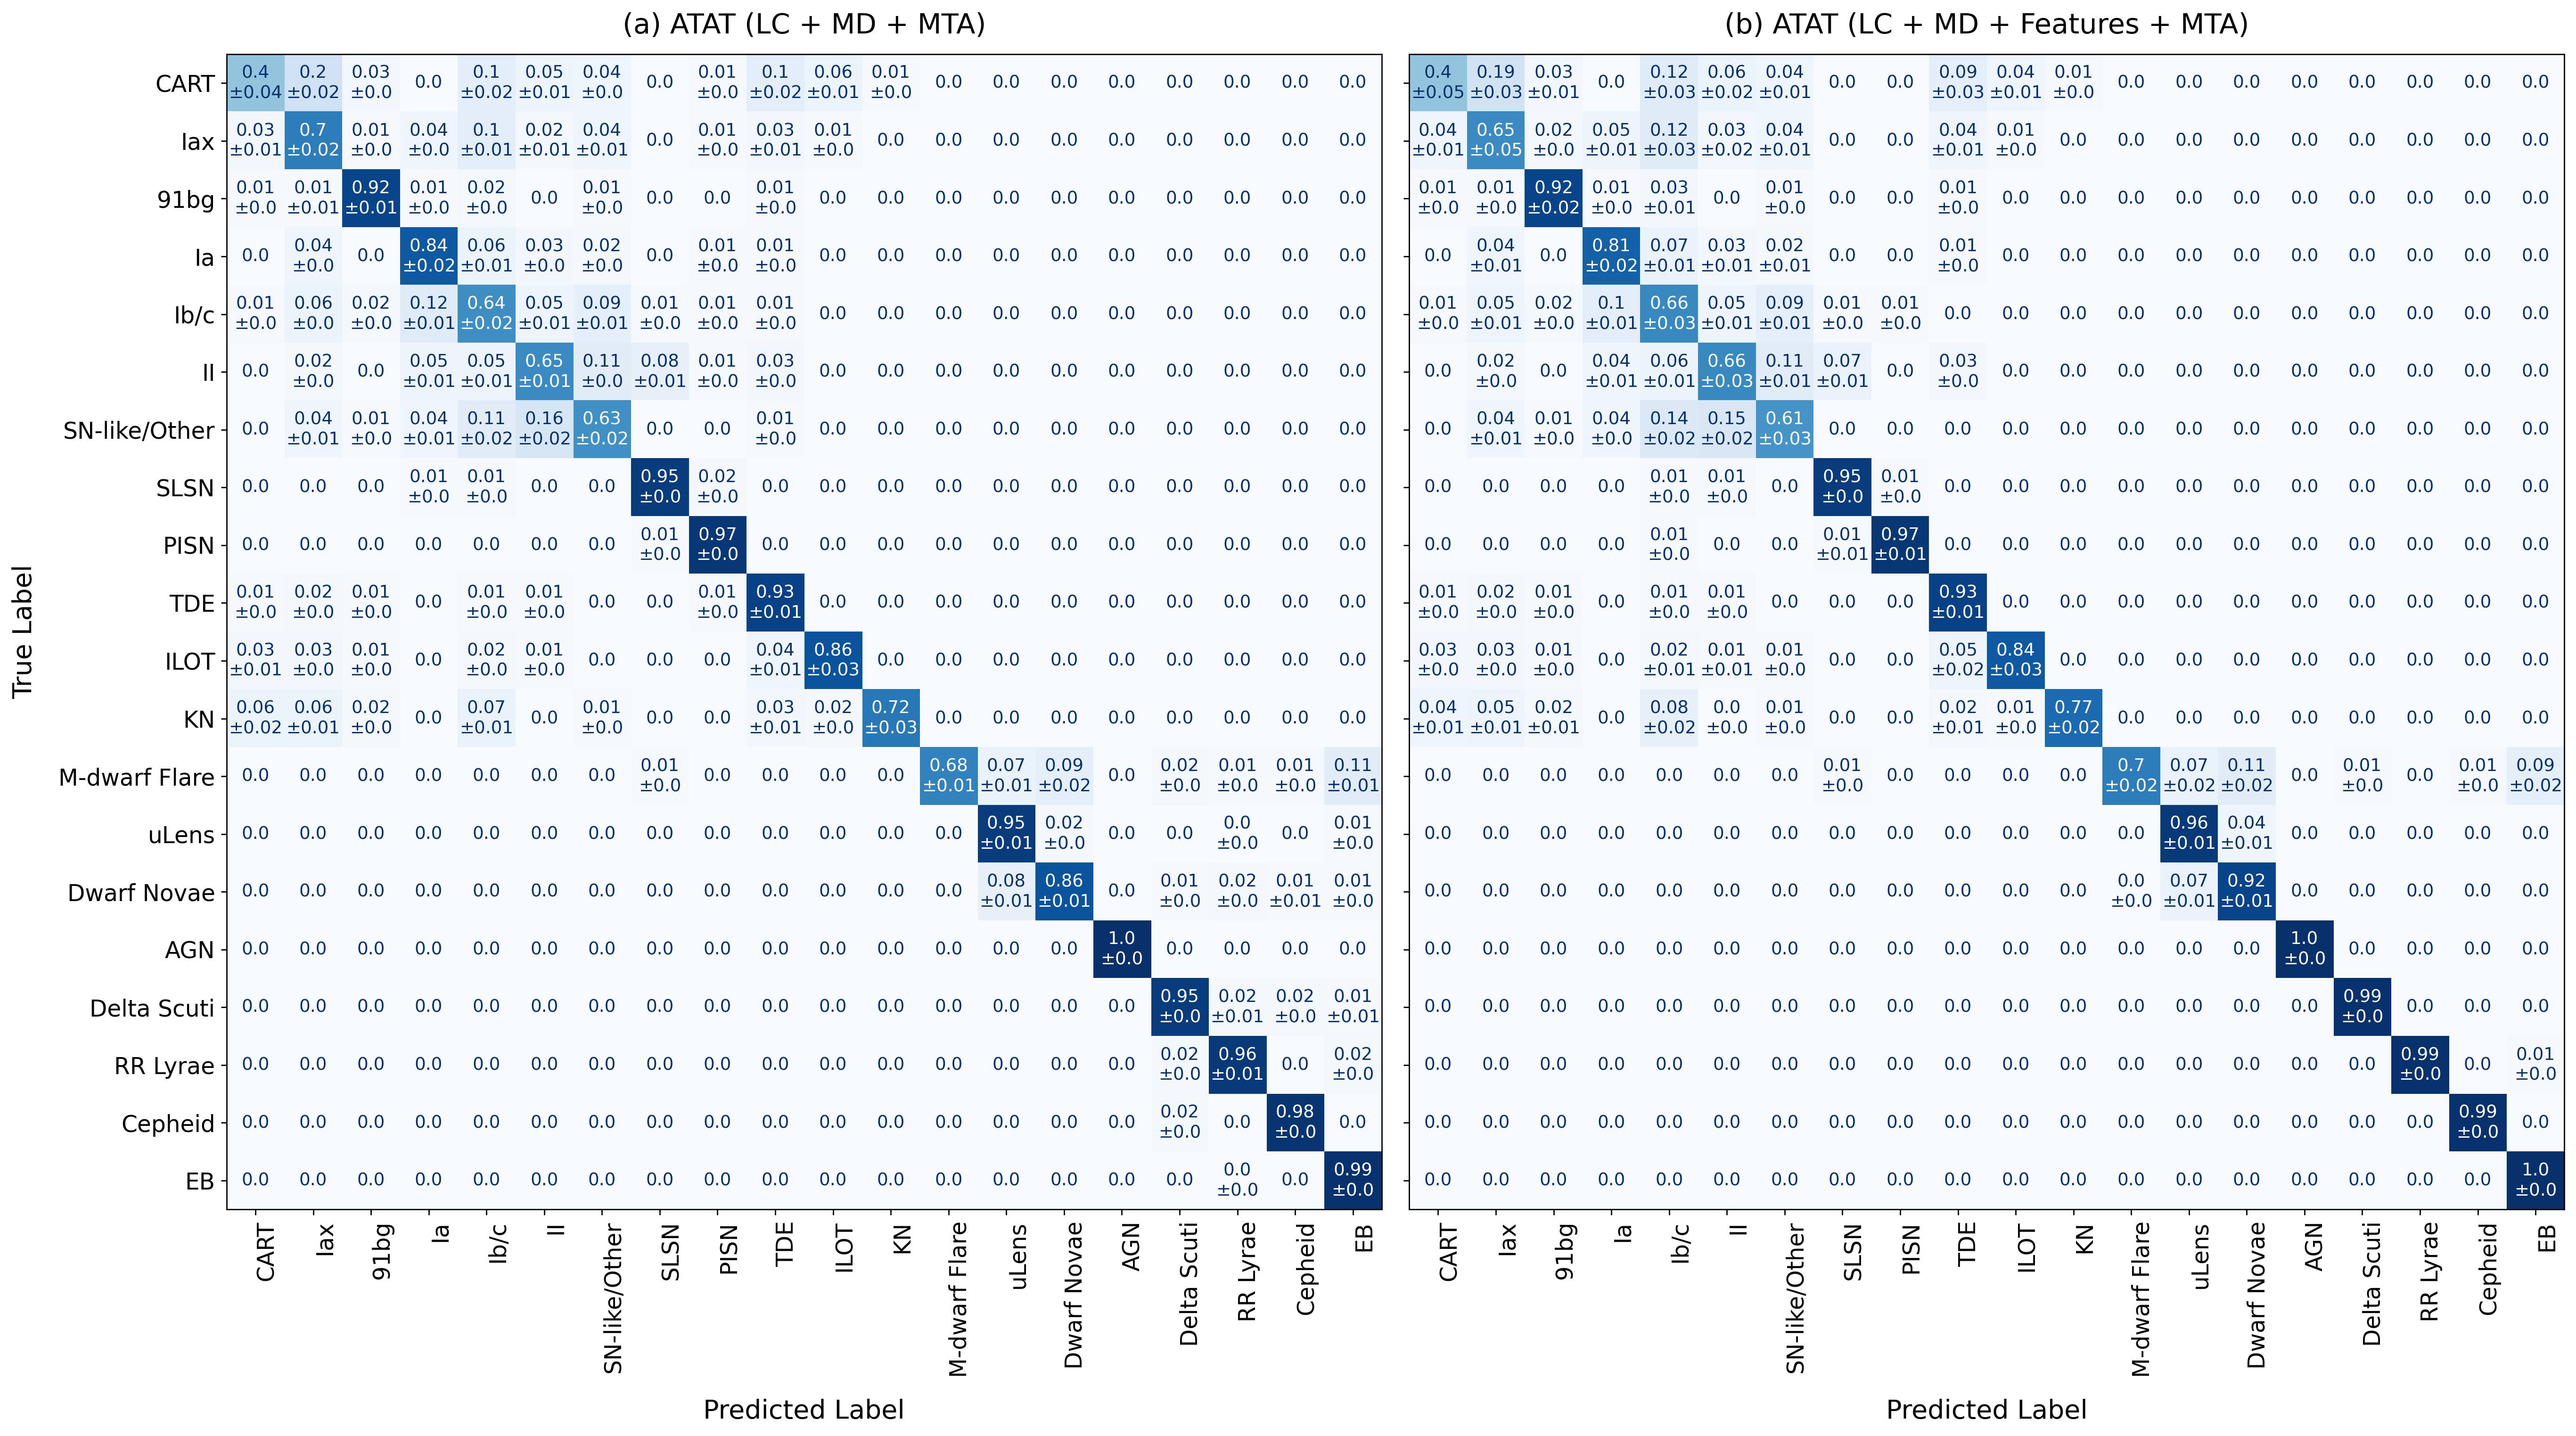

In [89]:
# Graficando la matriz media
cmap = plt.cm.Blues
#fig, ax = plt.subplots(figsize=(13, 13)) #, dpi=110)
fig, axes = plt.subplots(1, 2, figsize=(22, 22), sharey=True, dpi=250)

titles = ['(a) ATAT (LC + MD + MTA)', '(b) ATAT (LC + MD + Features + MTA)']
mean_matrices_col = [mean_matrix_lc_md, mean_matrix_lc_md_feat]
std_matrices_col = [std_matrix_lc_md, std_matrix_lc_md_feat]

for cont, (ax, mean_matrix, std_matrix) in enumerate(zip(axes, mean_matrices_col, std_matrices_col)):
    im = ax.imshow(np.around(mean_matrix, decimals=2), interpolation='nearest', cmap=cmap)

    # color map
    new_color = cmap(1.0) 

    # Añadiendo manualmente las anotaciones con la media y desviación estándar
    for i in range(mean_matrix.shape[0]):
        for j in range(mean_matrix.shape[1]):
            if mean_matrix[i, j] >= 0.005:
                #print(mean_matrix[i, j])
                text = f'{np.around(mean_matrix[i, j], decimals=2)}\n±{np.around(std_matrix[i, j], decimals=2)}'
                color = "white" if mean_matrix[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
                ax.text(j, i, text, ha="center", va="center", color=color, fontsize=10.7)
            else:
                text = f'{np.around(mean_matrix[i, j], decimals=2)}'
                color = "white" if mean_matrix[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
                ax.text(j, i, text, ha="center", va="center", color=color, fontsize=10.7)

    # Ajustes finales y mostrar la gráfica
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xticks(np.arange(len(order_classes)))
    ax.set_yticks(np.arange(len(order_classes)))
    ax.set_xticklabels(order_classes)
    ax.set_yticklabels(order_classes)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.xaxis.labelpad = 13
    ax.yaxis.labelpad = 13

    ax.set_title(titles[cont], fontsize=17, pad=13)
    ax.set_xlabel('Predicted Label', fontsize=16)

    if cont == 0:
        ax.set_ylabel('True Label', fontsize=16)

plt.tight_layout()
#os.makedirs('images', exist_ok=True)
#plt.savefig("./images/cm_ATAT.pdf", format="pdf", bbox_inches="tight")
plt.show()

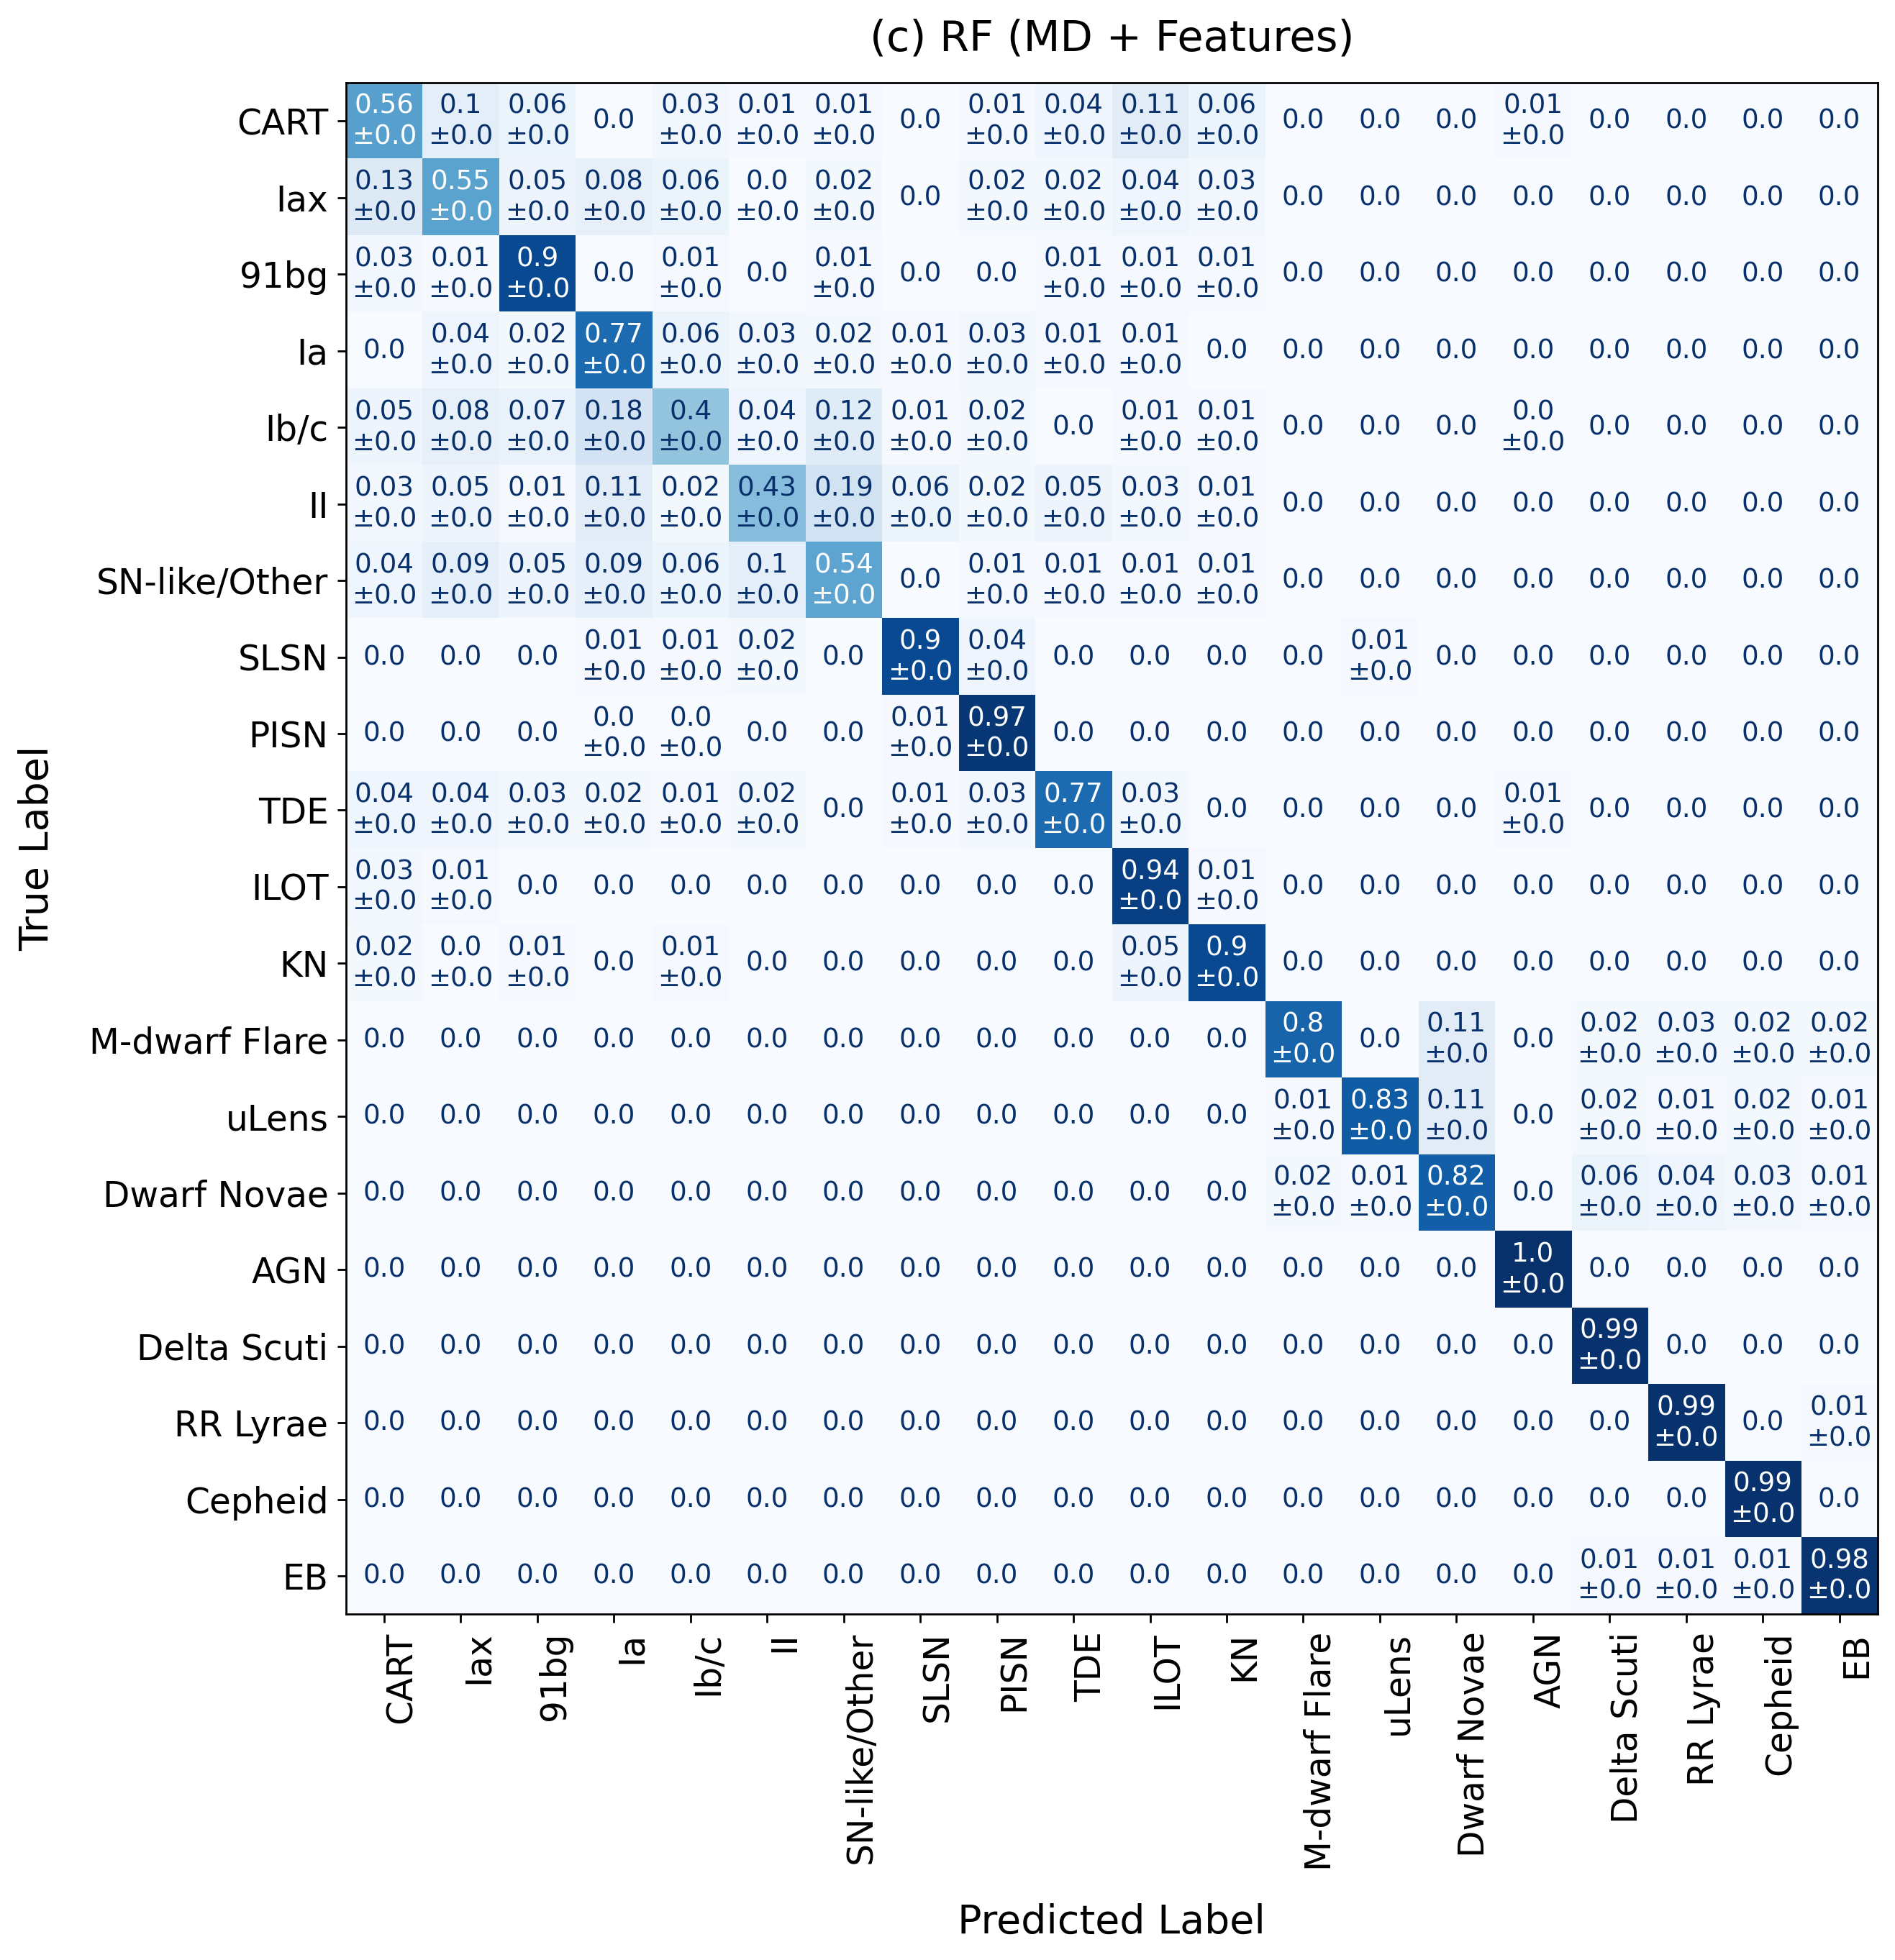

In [90]:
title = '(c) RF (MD + Features)'

# Graficando la matriz media
cmap = plt.cm.Blues
#fig, ax = plt.subplots(figsize=(13, 13)) #, dpi=110)
fig, ax = plt.subplots(1, 1, figsize=(11, 11), sharey=True, dpi=250)

im = ax.imshow(np.around(mean_matrix_rf, decimals=2), interpolation='nearest', cmap=cmap)

# color map
new_color = cmap(1.0) 

# Añadiendo manualmente las anotaciones con la media y desviación estándar
for i in range(mean_matrix_rf.shape[0]):
    for j in range(mean_matrix_rf.shape[1]):
        if mean_matrix_rf[i, j] >= 0.005:
            #print(mean_matrix_rf[i, j])
            text = f'{np.around(mean_matrix_rf[i, j], decimals=2)}\n±{np.around(std_matrix_rf[i, j], decimals=2)}'
            color = "white" if mean_matrix_rf[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
            ax.text(j, i, text, ha="center", va="center", color=color, fontsize=10.7)
        else:
            text = f'{np.around(mean_matrix_rf[i, j], decimals=2)}'
            color = "white" if mean_matrix_rf[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
            ax.text(j, i, text, ha="center", va="center", color=color, fontsize=10.7)

# Ajustes finales y mostrar la gráfica
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticks(np.arange(len(order_classes)))
ax.set_yticks(np.arange(len(order_classes)))
ax.set_xticklabels(order_classes)
ax.set_yticklabels(order_classes)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.xaxis.labelpad = 13
ax.yaxis.labelpad = 13

ax.set_title(title, fontsize=17, pad=13)
ax.set_xlabel('Predicted Label', fontsize=16)
ax.set_ylabel('True Label', fontsize=16)

plt.tight_layout()
#os.makedirs('images', exist_ok=True)
#plt.savefig("./images/cm_rf.pdf", format="pdf", bbox_inches="tight")
plt.show()